In [14]:
from re import template
from skimage.util.dtype import img_as_float
from myplot import *
from meanFilter import *
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,io,feature,color
from skimage.draw import circle_perimeter

In [15]:
def paddingZero(_img,_size):#填充
    h = _img.shape[0]+2*int((_size-1)/2)
    w = _img.shape[1]+2*int((_size-1)/2)
    n = np.zeros((h,w))
    start_0 = int((_size-1)/2)
    end_0 = int((_size-1)/2)+_img.shape[0]
    start_1 = int((_size-1)/2)
    end_1 = int((_size-1)/2)+_img.shape[1]
    n[start_0:end_0,start_1:end_1] = _img
    return n

In [16]:
imglist =[]
guass_template = np.array([ #高斯滤波模板
        [1,4,7,4,1],
        [4,16,26,16,4],
        [7,26,41,26,7],
        [4,16,26,16,4],
        [1,4,7,4,1]
    ])

In [17]:
def harris(pic,k,template):#参数k和模板
    img=img_as_float(pic)
    img_gray=color.rgb2gray(img)#转成黑白
    height=img_gray.shape[0]
    width=img_gray.shape[1]
    img_gx=np.zeros_like(img_gray)
    img_gy=np.zeros_like(img_gray)
    
    #计算每个像素水平方向的梯度和垂直方向梯度
    t_size=3 #sobel
    img_padded = paddingZero(img_gray,t_size)#填充
    mx = np.array([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ])
    my = mx.T
    for i in range(height):
        for j in range(width):
            window = img_padded[i:i+t_size,j:j+t_size]
            _gx = np.sum(window*mx)
            _gy = np.sum(window*my)
            img_gx[i,j]=_gx
            img_gy[i,j]=_gy
        
    #计算A、B、C
    A = img_gx*img_gx
    B = img_gx*img_gy
    C = img_gy**2
    
    #计算a、b、c
    a = meanFiletr(A,template)
    b = meanFiletr(B,template)
    c = meanFiletr(C,template)
    
    #计算R
    R = a * c - b * b - k*(a + c)**2
    
    #R值筛选
    R[R<0.3*np.max(R)] = 0
    
    #在原始图像中标注   
    target = np.copy(img)
    for i in range(target.shape[0]):
        for j in range(target.shape[1]):
            if R[i,j]!=0:
                cy,cx=circle_perimeter(i,j,2,shape=target.shape)
                if img.ndim == 3:
                    target[cy,cx]=(255,0,0)
                else:
                    if img.dtype == np.float:
                        target[cy,cx]=1
                    else:
                        target[cy,cx]=255
    imglist.append((img,'原始图像'))
    imglist.append((img_gray,'灰度图像'))
    imglist.append((img_gx,'x方向梯度图像'))
    imglist.append((img_gy,'y方向梯度图像'))
    imglist.append((a,'卷积图像'))
    imglist.append((b,'卷积图像'))
    imglist.append((c,'卷积图像'))
    imglist.append((target,'角点检测结果'))

<ipython-input-17-c4be91876435>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_gray=color.rgb2gray(img)#转成黑白


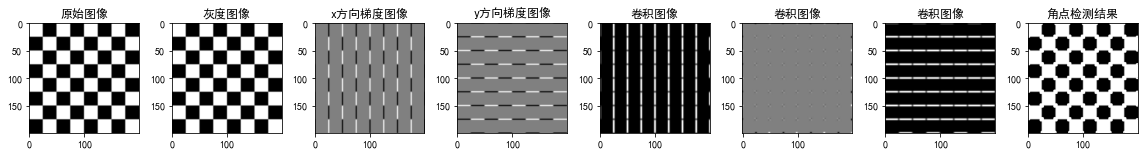

In [18]:
harris(data.checkerboard(),0.04,guass_template)#图片地址，参数k，模板
myPlot(imglist)